In [ ]:
# Imports
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# reading the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data_glotip.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


In [ ]:

df.rename(columns={
    'Unnamed: 2': 'REGION',
    'Unnamed: 3': 'SUB-REGION',
    'Unnamed: 4': 'INDICATOR',
    'Unnamed: 5': 'DIMENSION',
    'Unnamed: 6': 'CATEGORY',
    'Unnamed: 7': 'SEX',
    'Unnamed: 8': 'AGE',
    'Unnamed: 9': 'YEAR',
    'Unnamed: 10': 'COUNTS',
    'Unnamed: 11': 'CASE-VALUE',
    'Unnamed: 12': 'SOURCE'
}, inplace=True)

print(df)

            UNODC unodc_ddds@un.org    REGION  \
0      30/05/2023               NaN       NaN   
1       Iso3_code           Country    Region   
2             ABW             Aruba  Americas   
3             AFG       Afghanistan      Asia   
4             AFG       Afghanistan      Asia   
...           ...               ...       ...   
46553         ZWE          Zimbabwe    Africa   
46554         ZWE          Zimbabwe    Africa   
46555         ZWE          Zimbabwe    Africa   
46556         ZWE          Zimbabwe    Africa   
46557         ZWE          Zimbabwe    Africa   

                            SUB-REGION                     INDICATOR  \
0                                  NaN                           NaN   
1                            Subregion                     Indicator   
2      Latin America and the Caribbean  Detected trafficking victims   
3                        Southern Asia  Detected trafficking victims   
4                        Southern Asia  Detected tr

In [ ]:

df.columns

Index(['UNODC', 'unodc_ddds@un.org', 'REGION', 'SUB-REGION', 'INDICATOR',
       'DIMENSION', 'CATEGORY', 'SEX', 'AGE', 'YEAR', 'COUNTS', 'CASE-VALUE',
       'SOURCE'],
      dtype='object')

In [ ]:
df.head()

,UNODC,unodc_ddds@un.org,REGION,SUB-REGION,INDICATOR,DIMENSION,CATEGORY,SEX,AGE,YEAR,COUNTS,CASE-VALUE,SOURCE
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


In [ ]:
columns_checked = ["DIMENSION", "CATEGORY", "SEX", "AGE"]
filtered_df = df[~df[columns_checked].isin(['Total']).any(axis=1)].reset_index(drop=True)

filtered_df



,UNODC,unodc_ddds@un.org,REGION,SUB-REGION,INDICATOR,DIMENSION,CATEGORY,SEX,AGE,YEAR,COUNTS,CASE-VALUE,SOURCE
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,<5,GLOTIP
3,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,<5,GLOTIP
4,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,UZB,Uzbekistan,Asia,Central Asia,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2021,Counts,20,GLOTIP
5983,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,<5,GLOTIP
5984,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,<5,GLOTIP
5985,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,<5,GLOTIP


In [ ]:
filtered_df = filtered_df.dropna()
filtered_df

,UNODC,unodc_ddds@un.org,REGION,SUB-REGION,INDICATOR,DIMENSION,CATEGORY,SEX,AGE,YEAR,COUNTS,CASE-VALUE,SOURCE
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,<5,GLOTIP
3,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,<5,GLOTIP
4,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
5,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,UZB,Uzbekistan,Asia,Central Asia,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2021,Counts,20,GLOTIP
5983,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,<5,GLOTIP
5984,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,<5,GLOTIP
5985,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,<5,GLOTIP


In [ ]:
filtered_df = filtered_df.drop(1).reset_index(drop=True)
filtered_df

,UNODC,unodc_ddds@un.org,REGION,SUB-REGION,INDICATOR,DIMENSION,CATEGORY,SEX,AGE,YEAR,COUNTS,CASE-VALUE,SOURCE
0,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,<5,GLOTIP
1,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,<5,GLOTIP
2,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
3,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
4,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2017,Counts,<5,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,UZB,Uzbekistan,Asia,Central Asia,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2021,Counts,20,GLOTIP
5727,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,<5,GLOTIP
5728,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,<5,GLOTIP
5729,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,<5,GLOTIP


In [ ]:
null_sum = filtered_df.isnull().sum()
null_sum


,0
UNODC,0
unodc_ddds@un.org,0
REGION,0
SUB-REGION,0
INDICATOR,0
DIMENSION,0
CATEGORY,0
SEX,0
AGE,0
YEAR,0


In [ ]:
filtered_df.dtypes


,0
UNODC,object
unodc_ddds@un.org,object
REGION,object
SUB-REGION,object
INDICATOR,object
DIMENSION,object
CATEGORY,object
SEX,object
AGE,object
YEAR,object


In [ ]:
df = filtered_df[~filtered_df['CASE-VALUE'].str.contains('<|>', na=False)]
print(df)

     UNODC unodc_ddds@un.org  REGION          SUB-REGION  \
2      AGO            Angola  Africa  Sub-Saharan Africa   
3      AGO            Angola  Africa  Sub-Saharan Africa   
18     AGO            Angola  Africa  Sub-Saharan Africa   
28     AGO            Angola  Africa  Sub-Saharan Africa   
36     ALB           Albania  Europe     Southern Europe   
...    ...               ...     ...                 ...   
5719   UZB        Uzbekistan    Asia        Central Asia   
5721   UZB        Uzbekistan    Asia        Central Asia   
5723   UZB        Uzbekistan    Asia        Central Asia   
5725   UZB        Uzbekistan    Asia        Central Asia   
5726   UZB        Uzbekistan    Asia        Central Asia   

                         INDICATOR                DIMENSION  \
2     Detected trafficking victims  by form of exploitation   
3     Detected trafficking victims  by form of exploitation   
18    Detected trafficking victims  by form of exploitation   
28    Detected trafficking 

Saving cleaned data to a new csv file

In [ ]:
df.to_csv('/content/drive/MyDrive/Cleaned_human-trafficking.csv')

In [ ]:
# Create a new DataFrame with only 'YEAR' and 'CASE-VALUE' columns
df = df[['YEAR', 'CASE-VALUE']]
print(df)

      YEAR CASE-VALUE
2     2017         12
3     2017          5
18    2019          5
28    2020          8
36    2017         16
...    ...        ...
5719  2019         16
5721  2020         20
5723  2020         10
5725  2021         34
5726  2021         20

[1863 rows x 2 columns]


In [ ]:
df['CASE-VALUE'] = df['CASE-VALUE'].str.replace(',', '').astype(int)

# Convert YEAR to integer
df['YEAR'] = df['YEAR'].astype(int)

# Convert YEAR to datetime, setting the date to January 1st
df['YEAR'] = pd.to_datetime(df['YEAR'].astype(str) + '-01-01')

# Display the updated DataFrame and its data types
print(df)
print(df.dtypes)

           YEAR  CASE-VALUE
2    2017-01-01          12
3    2017-01-01           5
18   2019-01-01           5
28   2020-01-01           8
36   2017-01-01          16
...         ...         ...
5719 2019-01-01          16
5721 2020-01-01          20
5723 2020-01-01          10
5725 2021-01-01          34
5726 2021-01-01          20

[1863 rows x 2 columns]
YEAR          datetime64[ns]
CASE-VALUE             int64
dtype: object


<ipython-input-64-2109be6c40b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASE-VALUE'] = df['CASE-VALUE'].str.replace(',', '').astype(int)
<ipython-input-64-2109be6c40b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] = df['YEAR'].astype(int)
<ipython-input-64-2109be6c40b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
 # Renaming columns
df.rename(columns={'YEAR': 'ds', 'CASE-VALUE':'y'}, inplace=True)

<ipython-input-65-c6d6061c22c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'YEAR': 'ds', 'CASE-VALUE':'y'}, inplace=True)


In [ ]:
df.tail()

,ds,y
5719,2019-01-01,16
5721,2020-01-01,20
5723,2020-01-01,10
5725,2021-01-01,34
5726,2021-01-01,20


# Implementing Forecasing Model


In [ ]:
#Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4bz0239p/qh8r555f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4bz0239p/w1aaifd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63814', 'data', 'file=/tmp/tmp4bz0239p/qh8r555f.json', 'init=/tmp/tmp4bz0239p/w1aaifd4.json', 'output', 'file=/tmp/tmp4bz0239p/prophet_model55t1r41q/prophet_model-20241019202455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# creating a dataframe for future dates to forecast
future = model.make_future_dataframe(periods=365)

In [ ]:
# making a prediction
forecast = model.predict(future)

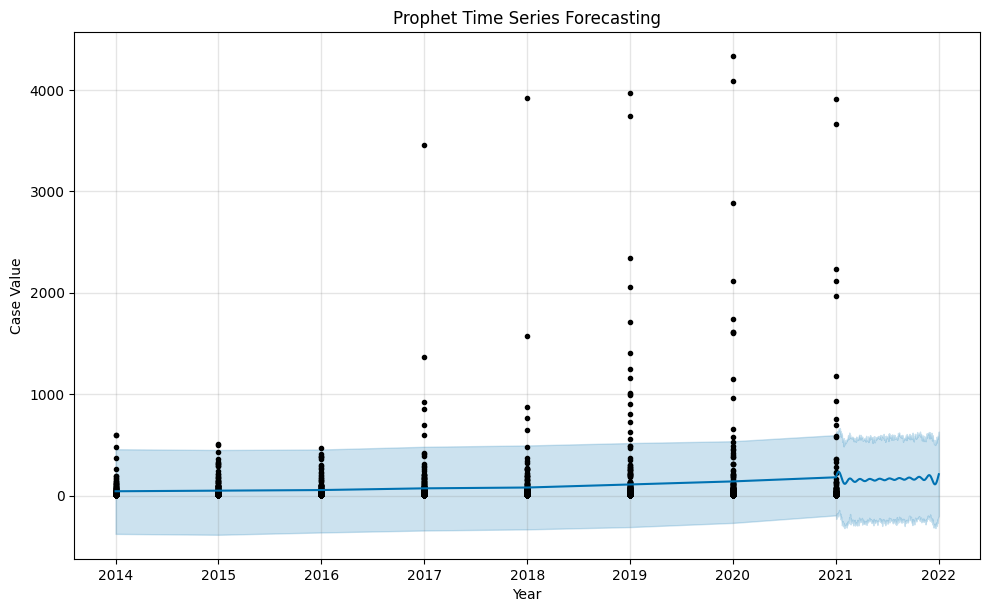

In [ ]:
# plotting the results
model.plot(forecast)
plt.title('Prophet Time Series Forecasting')
plt.xlabel('Year')
plt.ylabel('Case Value')
plt.show()

from the above graph we can

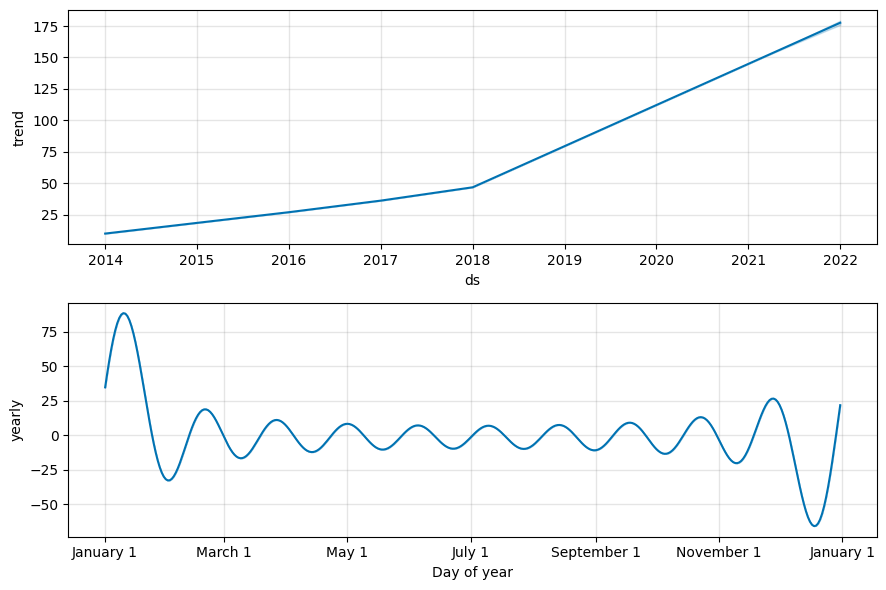

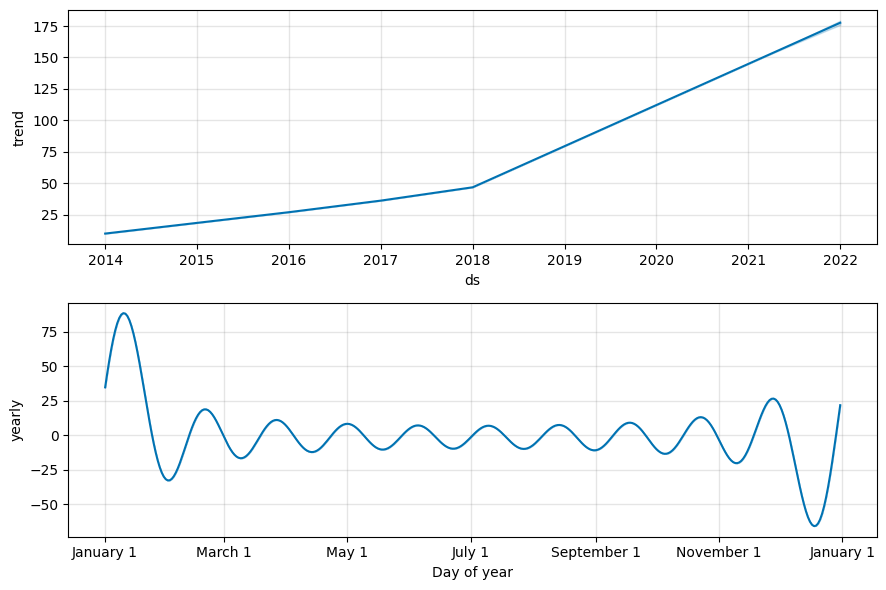

In [ ]:
model.plot_components(forecast)